# **IMPORTING LIBRARIES AND DEPENDENCIES**

In [3]:
import re
import string
import spacy
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")

# **READING RESUME DATASET**

In [4]:
data = pd.read_csv("resume_dataset.csv")
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."


# **DATA CLEANING**

**Checking if any missing values are there**

In [5]:
#printing the sume of null values of dataframe
print (data['Category'].isnull().sum())
print (data['Resume'].isnull().sum())

0
0


**Converting to lowercase**

In [6]:
#lower case conversion
data = data.apply(lambda x: x.str.lower() if x.dtype=='object' else x)
data.head()

,Category,Resume
0,data science,skills * programming languages: python (pandas...
1,data science,education details \nmay 2013 to may 2017 b.e ...
2,data science,"areas of interest deep learning, control syste..."
3,data science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,data science,"education details \n mca ymcaust, faridabad..."


**Removing unnecessary data**

In [7]:
data['Resume'] = data['Resume'].str.replace("[^a-zA-Z]"," ")
data.head()

,Category,Resume
0,data science,skills programming languages python pandas...
1,data science,education details may to may b e ...
2,data science,areas of interest deep learning control syste...
3,data science,skills r python sap hana table...
4,data science,education details mca ymcaust faridabad ...


**Tokenization**

In [8]:
tokenized_resume = data['Resume'].apply(lambda x: x.split()) #split function will tokenize the tweets
tokenized_resume.head(10)

0    [skills, programming, languages, python, panda...
1    [education, details, may, to, may, b, e, uit, ...
2    [areas, of, interest, deep, learning, control,...
3    [skills, r, python, sap, hana, tableau, sap, h...
4    [education, details, mca, ymcaust, faridabad, ...
5    [skills, c, basics, iot, python, matlab, data,...
6    [skills, python, tableau, data, visualization,...
7    [education, details, b, tech, rayat, and, bahr...
8    [personal, skills, ability, to, quickly, grasp...
9    [expertise, data, and, quantitative, analysis,...
Name: Resume, dtype: object

In [9]:
stop_words = stopwords.words('english') #stopwords from nltk
all_stopwords = nlp.Defaults.stop_words #stopwords from nlp

**Function to remove stopwords**

In [10]:
def stopwords(data):
    text = [word.lower() for word in data.split() if word.lower() not in stop_words and word.lower() not in all_stopwords]
    return " ".join(text)

In [11]:
data['Resume'] = data['Resume'].apply(stopwords)

In [12]:
data['Resume'] = data['Resume'].apply(remove_stopwords) #removing stopwords that are in gensim model

In [13]:
data.head()

,Category,Resume
0,data science,skills programming languages python pandas num...
1,data science,education details b e uit rgpvdata scientistda...
2,data science,areas deep learning control design programming...
3,data science,skills r python sap hana tableau sap hana sql ...
4,data science,education details mca ymcaust faridabad haryan...


**Lemmatization**

In [14]:
lem = WordNetLemmatizer()
def lemmatize(resume):
    lem_text = [lem.lemmatize(word) for word in resume.split()]
    return " ".join(lem_text)

In [15]:
data['Resume'] = data['Resume'].apply(lemmatize)
data.head()

,Category,Resume
0,data science,skill programming language python panda numpy ...
1,data science,education detail b e uit rgpvdata scientistdat...
2,data science,area deep learning control design programming ...
3,data science,skill r python sap hana tableau sap hana sql s...
4,data science,education detail mca ymcaust faridabad haryana...


**Analyzing categories of resumes**

In [16]:
data['Category'].value_counts()

java developer               14
database                     11
hr                           11
data science                 10
advocate                     10
devops engineer               7
automation testing            7
hadoop                        7
testing                       7
dotnet developer              7
health and fitness            6
python developer              6
civil engineer                6
arts                          6
sap developer                 6
business analyst              6
mechanical engineer           5
sales                         5
electrical engineering        5
blockchain                    5
network security engineer     5
web designing                 5
etl developer                 5
operations manager            4
pmo                           3
Name: Category, dtype: int64

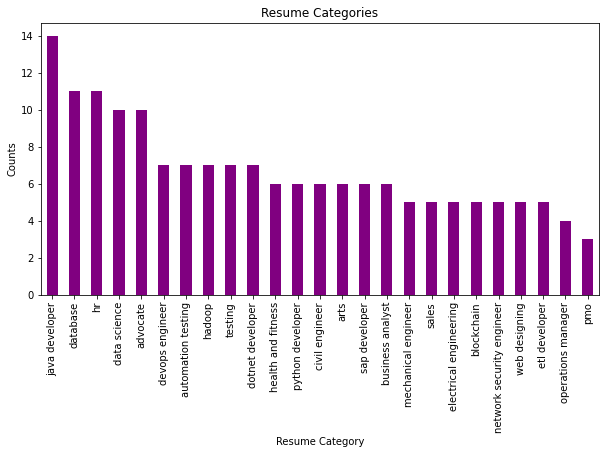

In [17]:
data["Category"].value_counts().plot(kind='bar', figsize = ((10,5)), color = 'purple',title='Resume Categories')
plt.xlabel("Resume Category")
plt.ylabel("Counts")
plt.show()

# Sentiment Analysis

**Initializing Analyser**

In [22]:
analyser = SentimentIntensityAnalyzer()

**Function for calculating scores**

In [25]:
def sentiment_scores(text):
    scores = analyser.polarity_scores(text)
    for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

In [26]:
sentiment_scores(data['Resume'].iloc[0])

compound: 0.9501, neg: 0.072, neu: 0.809, pos: 0.118, 

Positive, negative and neutral results represent the proportion of the text that falls in these categories

The Compound score is a metric that calculates the sum of all lexicon scores that have been normalized between -1 (most extreme negative) and +1 (most extreme positive). Compound is 0.95, which means very high positive sentiment.

**Adding scores of individual resumes**

In [28]:
data['Scores'] = data['Resume'].apply(lambda Review: analyser.polarity_scores(Review))
data.head()

,Category,Resume,Scores
0,data science,skill programming language python panda numpy ...,"{'neg': 0.072, 'neu': 0.809, 'pos': 0.118, 'co..."
1,data science,education detail b e uit rgpvdata scientistdat...,"{'neg': 0.064, 'neu': 0.896, 'pos': 0.04, 'com..."
2,data science,area deep learning control design programming ...,"{'neg': 0.011, 'neu': 0.9, 'pos': 0.089, 'comp..."
3,data science,skill r python sap hana tableau sap hana sql s...,"{'neg': 0.004, 'neu': 0.907, 'pos': 0.089, 'co..."
4,data science,education detail mca ymcaust faridabad haryana...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


**Adding Compound to individual resumes**

In [29]:
data['Compound'] = data['Scores'].apply(lambda score_dict: score_dict['compound'])
data.head()

,Category,Resume,Scores,Compound
0,data science,skill programming language python panda numpy ...,"{'neg': 0.072, 'neu': 0.809, 'pos': 0.118, 'co...",0.9501
1,data science,education detail b e uit rgpvdata scientistdat...,"{'neg': 0.064, 'neu': 0.896, 'pos': 0.04, 'com...",-0.4404
2,data science,area deep learning control design programming ...,"{'neg': 0.011, 'neu': 0.9, 'pos': 0.089, 'comp...",0.9042
3,data science,skill r python sap hana tableau sap hana sql s...,"{'neg': 0.004, 'neu': 0.907, 'pos': 0.089, 'co...",0.9941
4,data science,education detail mca ymcaust faridabad haryana...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


Each review has a negative, neutral, positive and complex result. 

The complex result is a comprehensive assessment of the first three points and this score is in the range of -1 to 1. 

Based on these results, sentiment is determined. 

If Compound is bigger than 0.5 the review is positive, from 0 to 0.5 is neutral and below than 0 is negative.

**Calculating overall tone of resumes**

In [30]:
def sentiment (score):
    if score >= 0.5:
        return 'Positive'
    if (score > 0) and (score < 0.5):
        return 'Neutral'
    if score <= 0:
        return 'Negative'

In [34]:
data['Sentiment'] = data['Compound'].apply(sentiment)
data.head(50)

,Category,Resume,Scores,Compound,Sentiment
0,data science,skill programming language python panda numpy ...,"{'neg': 0.072, 'neu': 0.809, 'pos': 0.118, 'co...",0.9501,Positive
1,data science,education detail b e uit rgpvdata scientistdat...,"{'neg': 0.064, 'neu': 0.896, 'pos': 0.04, 'com...",-0.4404,Negative
2,data science,area deep learning control design programming ...,"{'neg': 0.011, 'neu': 0.9, 'pos': 0.089, 'comp...",0.9042,Positive
3,data science,skill r python sap hana tableau sap hana sql s...,"{'neg': 0.004, 'neu': 0.907, 'pos': 0.089, 'co...",0.9941,Positive
4,data science,education detail mca ymcaust faridabad haryana...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Negative
5,data science,skill c basic iot python matlab data science m...,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.6908,Positive
6,data science,skill python tableau data visualization r stud...,"{'neg': 0.042, 'neu': 0.774, 'pos': 0.184, 'co...",0.9712,Positive
7,data science,education detail b tech rayat bahra institute ...,"{'neg': 0.013, 'neu': 0.813, 'pos': 0.174, 'co...",0.9990,Positive
8,data science,personal skill ability quickly grasp technical...,"{'neg': 0.006, 'neu': 0.841, 'pos': 0.153, 'co...",0.9790,Positive
9,data science,expertise data quantitative analysis decision ...,"{'neg': 0.044, 'neu': 0.848, 'pos': 0.108, 'co...",0.9729,Positive


In [35]:
data.tail()

,Category,Resume,Scores,Compound,Sentiment
164,testing,skill proficient m office word basic excel pow...,"{'neg': 0.038, 'neu': 0.819, 'pos': 0.143, 'co...",0.9747,Positive
165,testing,willingness accept challenge positive thinking...,"{'neg': 0.047, 'neu': 0.766, 'pos': 0.187, 'co...",0.9810,Positive
166,testing,personal skill quick learner eagerness learn n...,"{'neg': 0.01, 'neu': 0.884, 'pos': 0.106, 'com...",0.9810,Positive
167,testing,skill software knowledge m power point m offic...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Negative
168,testing,skill set o window xp database mysql sql serve...,"{'neg': 0.0, 'neu': 0.898, 'pos': 0.102, 'comp...",0.9559,Positive


**Summarization**

In [32]:
data['Sentiment'].value_counts()

Positive    136
Negative     18
Neutral      15
Name: Sentiment, dtype: int64